In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()
 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df = df[df['job_title_short'] == 'Data Analyst']

In [4]:
df_exploded = df.explode('job_skills')

skil_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)


skills_stats = skil_stats.sort_values(by='skill_count', ascending=False).head(10)




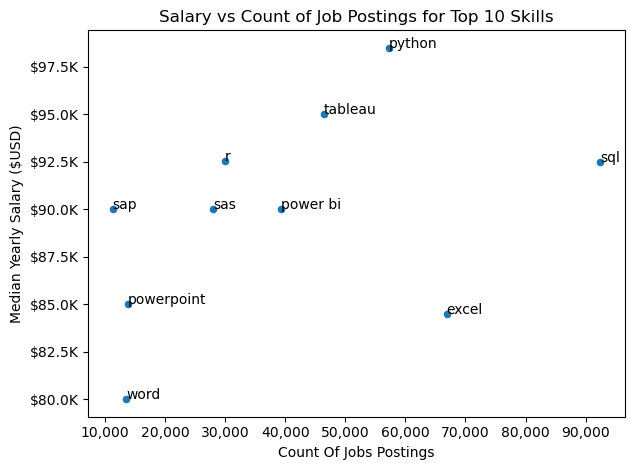

In [5]:
import matplotlib.ticker as mticker


skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')


for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count Of Jobs Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${(y/1000)}K"))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()